In [1]:
# Importing libraries 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import PIL 
import tensorflow as tf 
import json
import pathlib

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 

from tfmesos2 import cluster


2023-11-07 17:19:41.267789: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 17:19:41.295942: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 17:19:41.295963: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 17:19:41.295979: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 17:19:41.300845: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 17:19:41.301372: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
data_dir = pathlib.Path("/mnt/mesos/sandbox/flower_photos/")

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory( 
	data_dir, 
	validation_split=0.2, 
	subset="training", 
	seed=123, 
	image_size=(180, 180), 
	batch_size=32,
    shuffle=True) 


Found 15 files belonging to 1 classes.
Using 12 files for training.


In [4]:

val_ds = tf.keras.utils.image_dataset_from_directory( 
    data_dir, 
    validation_split=0.2, 
    subset="validation", 
    seed=123, 
    image_size=(180,180), 
    batch_size=32,
    shuffle=True
    ) 

Found 15 files belonging to 1 classes.
Using 3 files for validation.


In [5]:
class_names = train_ds.class_names 
print(class_names)

num_classes = len(class_names) 

['roses']


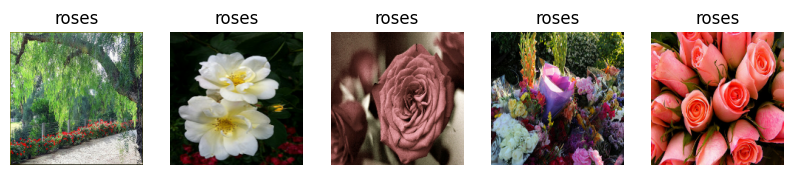

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10)) 

for images, labels in train_ds.take(1): 
	for i in range(5): 
		ax = plt.subplot(5, 5, i + 1) 
		plt.imshow(images[i].numpy().astype("uint8")) 
		plt.title(class_names[labels[i]]) 
		plt.axis("off") 


In [11]:
model = Sequential([ 
	layers.Rescaling(1./255, input_shape=(180,180, 3)), 
	layers.Conv2D(16, 3, padding='same', activation='relu'), 
	layers.MaxPooling2D(), 
	layers.Conv2D(32, 3, padding='same', activation='relu'), 
	layers.MaxPooling2D(), 
	layers.Conv2D(64, 3, padding='same', activation='relu'), 
	layers.MaxPooling2D(), 
	layers.Flatten(), 
	layers.Dense(128, activation='relu'), 
	layers.Dense(num_classes) 
]) 

model.compile(optimizer='adam', 
		  		  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
				  metrics=['accuracy']) 
    
model.summary()     

epochs=1

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=2)           

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

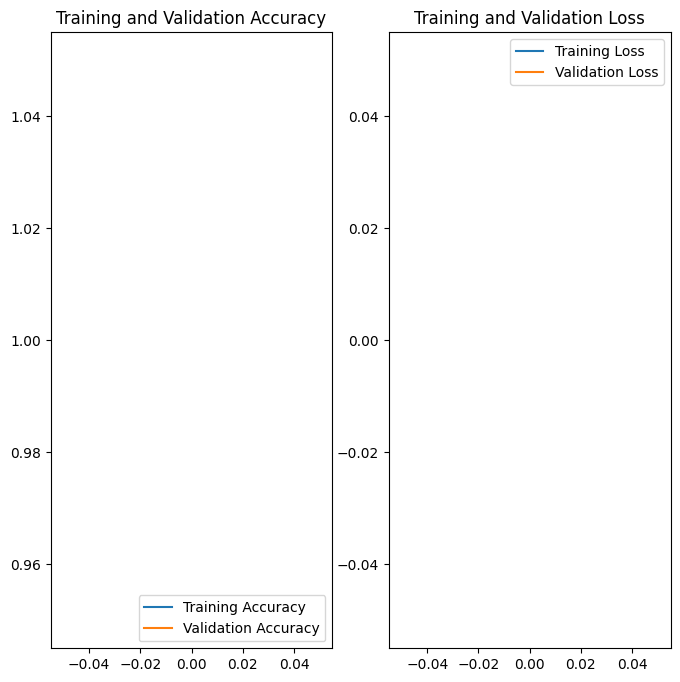

In [10]:
#Accuracy 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 

#loss 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

#epochs 
epochs_range = range(epochs) 

#Plotting graphs 
plt.figure(figsize=(8, 8)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 

plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show() 
